In [7]:
# Trajectory Visualization by Groups in Jupyter Notebook

import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from pathlib import Path
import folium
from folium import PolyLine
from folium.plugins import FeatureGroupSubGroup, MarkerCluster

In [4]:
file_path = Path.home() / "iCloudLink" / "Personal Project" / "数据集" / "cleaned_minimized_data.csv"
# Load the data (assuming your CSV is in the same directory)
df = pd.read_csv(file_path)
df

,Position
0,"[[-8.630325,41.154858],[-8.630577,41.154741],[..."
1,"[[-8.659953,41.156595],[-8.66088,41.156244],[-..."
2,"[[-8.611623,41.150412],[-8.611695,41.150412],[..."
3,"[[-8.610003,41.147802],[-8.609994,41.147802],[..."
4,"[[-8.610741,41.157225],[-8.610084,41.156856],[..."
...,...
95,"[[-8.643456,41.15754],[-8.643456,41.15754],[-8..."
96,"[[-8.628183,41.157477],[-8.628174,41.15745],[-..."
97,"[[-8.62011,41.146902],[-8.62002,41.14683],[-8...."
98,"[[-8.621082,41.160924],[-8.621046,41.160897],[..."


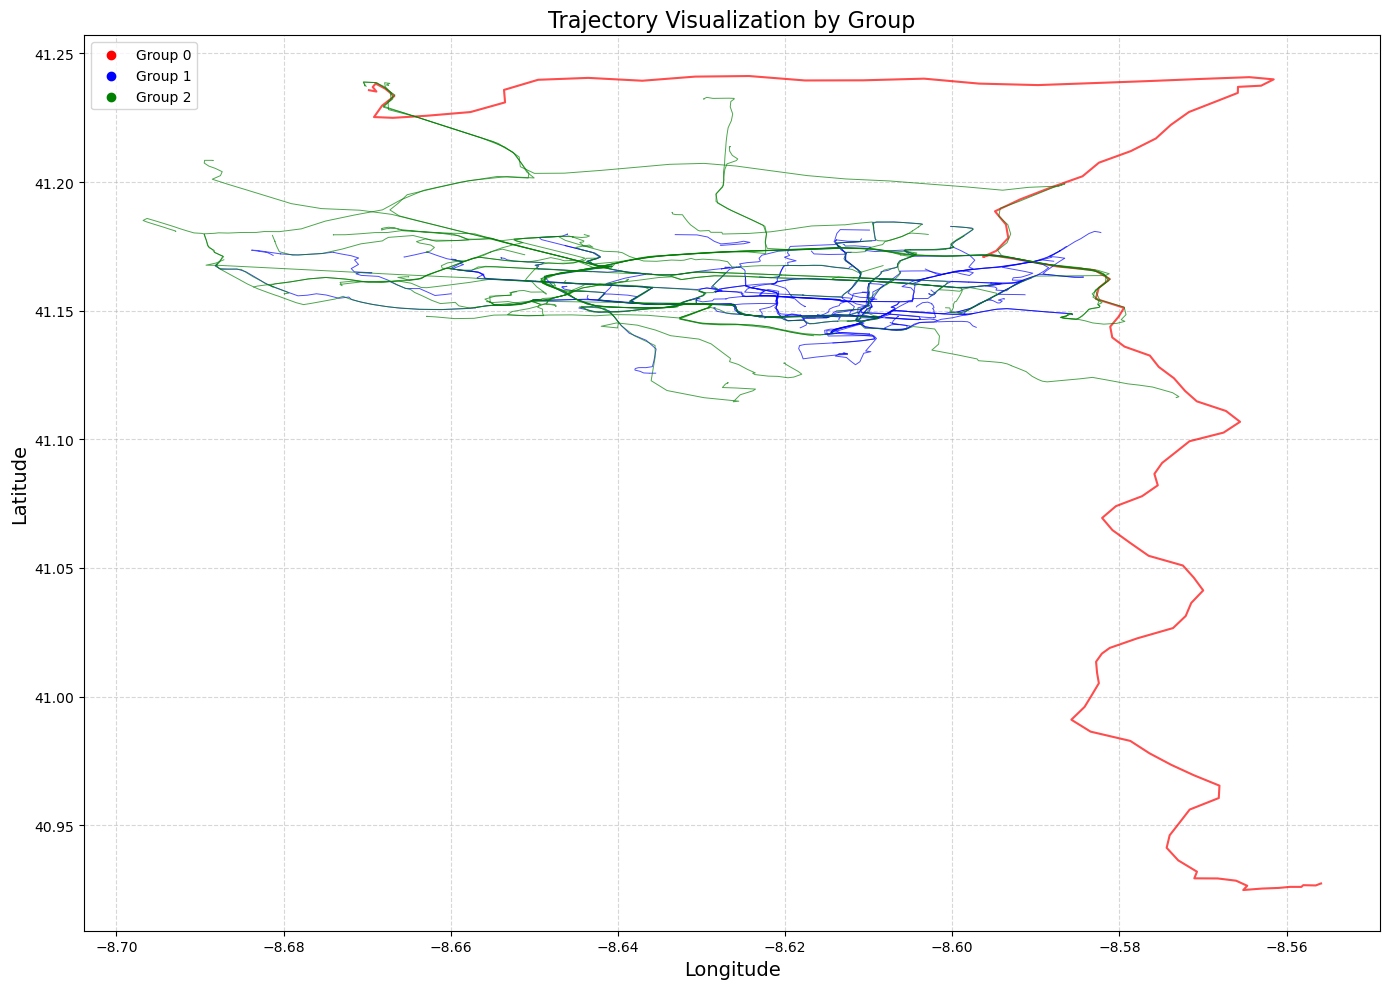

In [5]:
# Parse the trajectories
def parse_traj(traj_str):
    return np.array(ast.literal_eval(traj_str))

trajectories = df.iloc[:, 0].apply(parse_traj)

# Group indices as provided
group0 = [34]
group1 = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 29, 31, 33, 35, 36, 38, 39, 44, 45, 46, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 65, 66, 68, 70, 72, 74, 78, 82, 83, 84, 85, 87, 90, 92, 96, 97, 98, 99]
group2 = [6, 17, 19, 27, 28, 30, 32, 37, 40, 41, 42, 43, 47, 49, 61, 62, 64, 67, 69, 71, 73, 75, 76, 77, 79, 80, 81, 86, 88, 89, 91, 93, 94, 95]

# Plot
plt.figure(figsize=(14, 10))

colors = ['red', 'blue', 'green']
labels = ['Group 0', 'Group 1', 'Group 2']
groups = [group0, group1, group2]

for group_idx, group in enumerate(groups):
    for idx in group:
        traj = trajectories.iloc[idx]
        plt.plot(traj[:, 0], traj[:, 1], color=colors[group_idx], alpha=0.7, linewidth=1.5 if group_idx==0 else 0.7)
    plt.scatter([], [], color=colors[group_idx], label=labels[group_idx])  # For legend only

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Trajectory Visualization by Group", fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()